# **Problem 1 - Bias Variance Tradeoff**


## Q1.

(-1.0, 7.0)

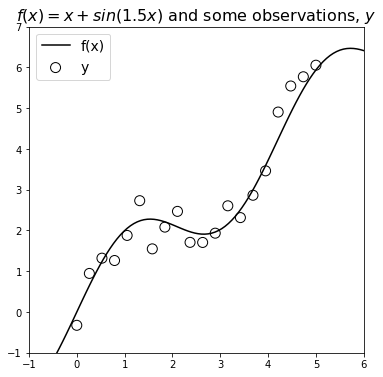

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'pink', 'green', 'royalblue']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 20
NOISE_STD = 0.3

# limit the range of x range for the 20 points generated to lie between some range, say 0 and 5, to observe overfitting and underfitting
x = np.linspace(0,5,20)
x_grid = np.linspace(-1, 6, 100)


def f(x):
    """Base function"""
    return x + np.sin(1.5 * x)


def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std


def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = x + sin(1.5x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 6])
plt.ylim([-1, 7])

## Q2.

We can observe that g1(x) is underfitting and g10(x) is overfitting.


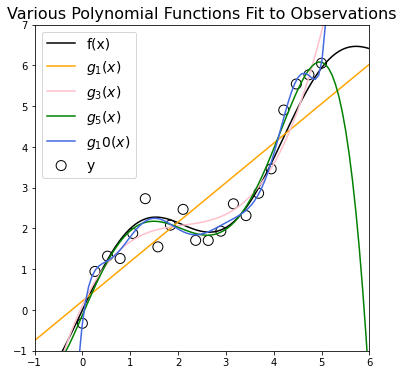

In [ ]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 5, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{degree}(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 6])
plt.ylim([-1, 7])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)
print("We can observe that g1(x) is underfitting and g10(x) is overfitting.")

## Q3.

### (a).

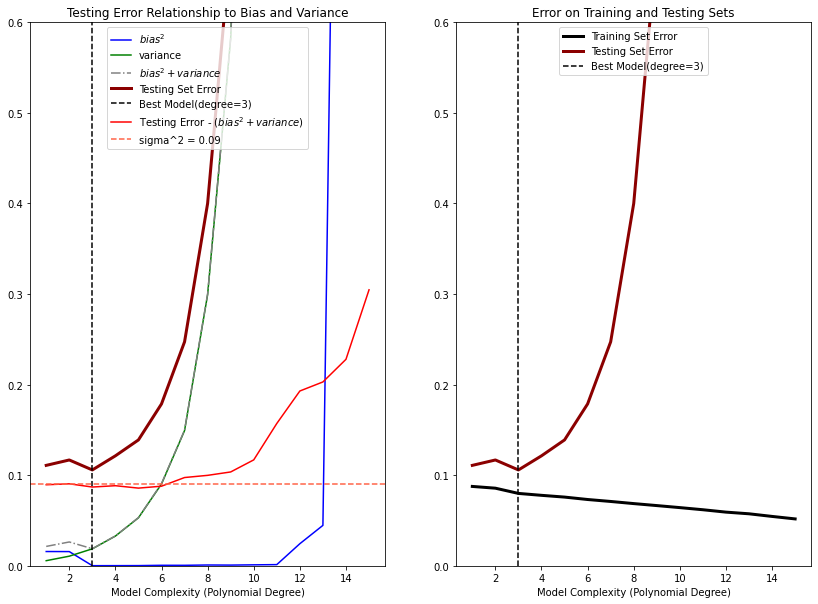

In [ ]:
from collections import defaultdict

np.random.seed(124)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .3
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))

# Create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)


def error_function(pred, actual):
    return (pred - actual) ** 2

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'sigma^2 = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

### (b).

In [ ]:
print("Through the graph, we could know that the best model is the model with degree 3, which has the smallest Mean Squared Error.")
bias_squared_g3 = bias_squared[2]
variance_g3 = variance[2]
MSE_g3 = bias_squared_g3 + variance_g3
print("Bias Squared of model 3 : ", bias_squared_g3)
print("Variance of model 3 : ", variance_g3)
print("MSE of model 3 : ", MSE_g3)

Through the graph, we could know that the best model is the model with degree 3, which has the smallest Mean Squared Error.
Bias Squared of model 3 :  0.00013219065612478845
Variance of model 3 :  0.018731698134010422
MSE of model 3 :  0.01886388879013521


# **Problem 2 - KNN hyperparameter tuning using cross validation**

## Q1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset and slicing it into independent and dependent variables
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Since our dataset containing character variables we have to encode it using LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Training the K-NN model on the Training set
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
misclassification_error = 1-accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Misclassification error: ", misclassification_error)
print("Accuracy Score: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F-1 Score: ", f1)

Misclassification error:  0.050000000000000044
Accuracy Score:  0.95
Precision Score:  0.9090909090909091
Recall Score:  0.9090909090909091
F-1 Score:  0.9090909090909091


## Q2.

1


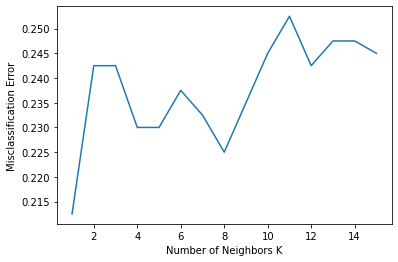

In [ ]:
from sklearn.model_selection import cross_val_score

#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,16)]

# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 1)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Q3.

1
1


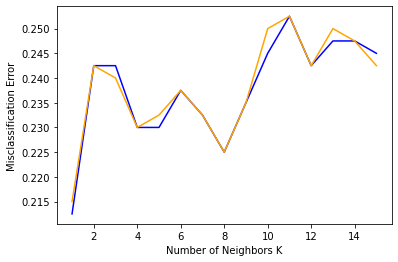

In [ ]:
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,16)]

# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 1)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE, color = 'b')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')


#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,16)]

# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE, color = 'orange')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Q4.

* Through the graph above, we could observe that the best value of K with Eucledian distance is 1, and it is the same with Manhattan distance.
* The combination p = 1 and K = 1 gives the best classifier.

# **Problem 3 - Which Algorithm is Better?**

In PDF file.

# **Problem 4 - Logistic Regression with Regularization**

## Q1.

1. C: float, default=1.0
* Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. 
---
2. solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
* Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects: For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones; For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* The choice of the algorithm depends on the penalty chosen: ‘newton-cg’ - [‘l2’, ‘none’]; ‘lbfgs’ - [‘l2’, ‘none’]; ‘liblinear’ - [‘l1’, ‘l2’]; ‘sag’ - [‘l2’, ‘none’]; ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
---
3. penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
* Specify the norm of the penalty.
* 'none': no penalty is added; 'l2': add a L2 penalty term and it is the default choice; 'l1': add a L1 penalty term; 'elasticnet': both L1 and L2 penalty terms are added.
---
4. multi_class: {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
* If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

## Q2.

* In Sklearn, the Ridge() classifier is used for L2 Regularization and the Lasso() classifier is used for L1 Regularization.
* L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients, whereas L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients.

## Q3.

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

# Data loading and train-test split
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 0)
sc = StandardScaler()
train_x_std = sc.fit_transform(train_x)
test_x_std = sc.transform(test_x)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Features
C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
penalty = ['l1', 'l2']
solver = 'liblinear'
multi_class = 'ovr'

weight_coef_l1_class0 = []
weight_coef_l1_class2 = []
weight_coef_l2_class0 = []
weight_coef_l2_class2 = []

# Logistic Regression
for c in C:
  lr = LogisticRegression(C = c, solver = solver, penalty = penalty[0], multi_class = multi_class)
  lr.fit(train_x, train_y)
  coef_class0 = lr.coef_[:, 2:4][[0]]
  coef_class2 = lr.coef_[:, 2:4][[2]]
  for ele in coef_class0:
    weight_coef_l1_class0.append(ele.tolist())
  for ele in coef_class2:
    weight_coef_l1_class2.append(ele.tolist())
  lr = LogisticRegression(C = c, solver = solver, penalty = penalty[1], multi_class = multi_class)
  lr.fit(train_x, train_y)
  coef_class0 = lr.coef_[:, 2:4][[0]]
  coef_class2 = lr.coef_[:, 2:4][[2]]
  for ele in coef_class0:
    weight_coef_l2_class0.append(ele.tolist())
  for ele in coef_class2:
    weight_coef_l2_class2.append(ele.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Using log(C) to make the graph more visible
C = np.log(C)

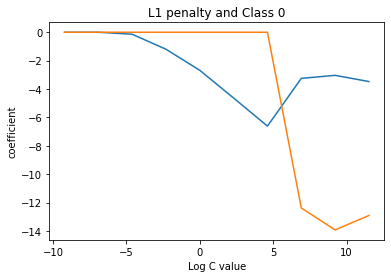

In [ ]:
import matplotlib.pyplot as plt
# Blue line is length and organe line is width
plt.plot(C,weight_coef_l1_class0)
plt.xlabel('Log C value')
plt.ylabel('coefficient')
plt.title('L1 penalty and Class 0')
plt.show()

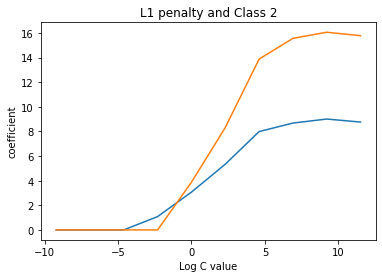

In [ ]:
plt.plot(C,weight_coef_l1_class2)
plt.xlabel('Log C value')
plt.ylabel('coefficient')
plt.title('L1 penalty and Class 2')
plt.show()

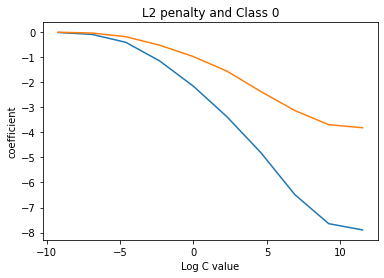

In [ ]:
plt.plot(C,weight_coef_l2_class0)
plt.xlabel('Log C value')
plt.ylabel('coefficient')
plt.title('L2 penalty and Class 0')
plt.show()

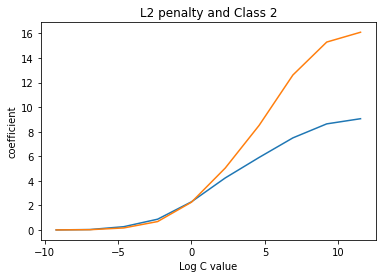

In [ ]:
plt.plot(C,weight_coef_l2_class2)
plt.xlabel('Log C value')
plt.ylabel('coefficient')
plt.title('L2 penalty and Class 2')
plt.show()

We can observe that L2 does not allow coefficient to be exactly 0, but L1 allows coefficient to be exactly 0. Besides, as the Log C value increases, the difference of the coefficients for class 0 and class 2 is increasing. 

## Q4.

In [ ]:
from cProfile import label
from scipy.linalg import norm
def draw(penalty):
    # Features
    C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
    solver = 'liblinear'
    multi_class = 'ovr'

    coef_length_c0 = []
    coef_width_c0 = []
    coef_length_c2 = []
    coef_width_c2 = []
    beta_c = []

    # Logistic Regression
    for c in C:
        lr = LogisticRegression(C = c, solver = solver, penalty = penalty, multi_class = multi_class)
        lr.fit(train_x, train_y)
        coef = lr.coef_[:, 2:4][[0,2]].flatten()
        coef_list = coef.tolist()
        coef_length_c0.append(coef_list[0])
        coef_width_c0.append(coef_list[1])
        coef_length_c2.append(coef_list[2])
        coef_width_c2.append(coef_list[3])
        beta_c.append(norm(coef,2))
        
    lr = LogisticRegression(C = 100000, solver = solver, penalty = penalty, multi_class = multi_class)
    lr.fit(train_x, train_y)
    coef = lr.coef_[:, 2:4][[0,2]].flatten()
    beta_100000 = norm(coef,2)
    ratio = []
    for ele in beta_c:
        ratio.append(ele/beta_100000)

    plt.plot(ratio,coef_length_c0,label='length_c0')
    plt.plot(ratio,coef_width_c0,label='width_c0')
    plt.plot(ratio,coef_length_c2,label='length_c2')
    plt.plot(ratio,coef_width_c2,label='width_c2')
    plt.xlabel('Ratio')
    plt.ylabel('Coefficient')
    plt.title(f'{penalty} Penalty')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


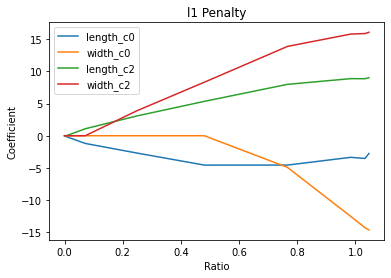

In [ ]:
draw('l1')

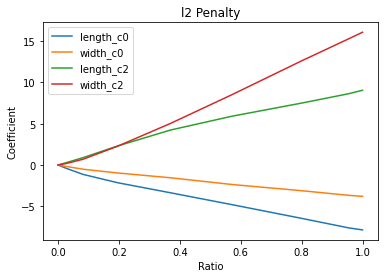

In [ ]:
draw('l2')

We could observe that as $||\beta_C|| _{2}$ increases, the ratio also increases. 

# **Problem 5 - Algorithmic Performance Scaling**

## Q1.

Dataset: https://www.openml.org/search?type=data&status=active&qualities.NumberOfClasses=gte_2&id=300

* number of features: 618
* number of instances: 7797
* number of classes: 26
* number of numerical features: 617
* number of categorical features: 1

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np

data,meta = arff.loadarff('isolet.arff')
df = pd.DataFrame(data)

It is a balanced dataset.


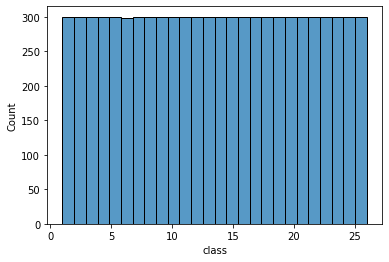

In [3]:
import seaborn

df['class'] = [int(df['class'][i]) for i in range(len(df['class']))]
y = df['class']
y = pd.Series(y)
X = df.drop(['class'], axis = 1)
seaborn.histplot(data=df, x="class",bins=26)
print("It is a balanced dataset.")

## Q2.

In [ ]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [ ]:


train, test = train_test_split(data, test_size=0.2,shuffle = True, stratify = df['class'])
test = pd.DataFrame(test)
train = pd.DataFrame(train)
Y_test = test['class'].astype("int")
X_test = test.drop(['class'], axis = 1)
tree_acc = []
tree_time = []
gb_time = []
gb_acc = []
frac_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for frac in tqdm(frac_list):
  #making subset
    sub_train = train.sample(frac=frac)
    sub_train_Y = sub_train['class'].astype("int")
    sub_train_X = sub_train.drop(['class'], axis = 1)

  #decision tree
    start = time.time()
    dt = tree.DecisionTreeClassifier().fit(sub_train_X, sub_train_Y)
    stop = time.time()
    tree_time.append(stop-start)
    Y_pred = dt.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    tree_acc.append(acc)
    
  #gradient boosting
    start = time.time()
    gb = GradientBoostingClassifier().fit(sub_train_X, sub_train_Y)
    stop = time.time()
    gb_time.append(stop - start)
    Y_pred= gb.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    gb_acc.append(acc)

for i in range(len(frac_list)):
  print(f'With fraction {frac_list[i]} \n tree time:{tree_time[i]}, tree accuracy:{tree_acc[i]}\n gb time:{gb_time[i]}, gb accuracy:{gb_acc[i]}\n')

100%|██████████| 10/10 [8:46:31<00:00, 3159.14s/it]

With fraction 0.1 
 tree time:0.18504118919372559, tree accuracy:0.6583333333333333
 gb time:134.9568555355072, gb accuracy:0.7096153846153846

With fraction 0.2 
 tree time:0.392087459564209, tree accuracy:0.7185897435897436
 gb time:292.732629776001, gb accuracy:0.841025641025641

With fraction 0.3 
 tree time:0.7631757259368896, tree accuracy:0.7705128205128206
 gb time:487.7947006225586, gb accuracy:0.8871794871794871

With fraction 0.4 
 tree time:1.1137630939483643, tree accuracy:0.7846153846153846
 gb time:683.0771822929382, gb accuracy:0.9064102564102564

With fraction 0.5 
 tree time:1.4102728366851807, tree accuracy:0.8057692307692308
 gb time:846.7595806121826, gb accuracy:0.9153846153846154

With fraction 0.6 
 tree time:1.7526860237121582, tree accuracy:0.7929487179487179
 gb time:969.2359578609467, gb accuracy:0.9256410256410257

With fraction 0.7 
 tree time:1.7804031372070312, tree accuracy:0.7967948717948717
 gb time:1116.2158789634705, gb accuracy:0.9314102564102564



In [ ]:
acc_time_table = pd.DataFrame({'sample_size':frac_list,'dt_time':tree_time,'dt_acc':tree_acc,'gb_time':gb_time,'gb_acc':gb_acc})
acc_time_table

,sample_size,dt_time,dt_acc,gb_time,gb_acc
0,0.1,0.185041,0.658333,134.956856,0.709615
1,0.2,0.392087,0.718590,292.732630,0.841026
2,0.3,0.763176,0.770513,487.794701,0.887179
3,0.4,1.113763,0.784615,683.077182,0.906410
4,0.5,1.410273,0.805769,846.759581,0.915385
5,0.6,1.752686,0.792949,969.235958,0.925641
6,0.7,1.780403,0.796795,1116.215879,0.931410
7,0.8,2.227504,0.815385,1309.828300,0.936538
8,0.9,2.502566,0.809615,4228.966674,0.937821
9,1.0,2.807635,0.813462,21506.112026,0.937821


## Q3

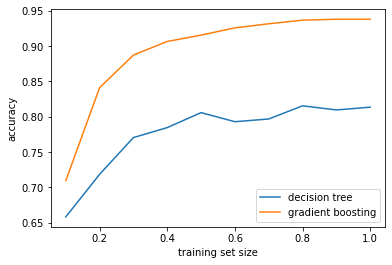

In [ ]:
import matplotlib.pyplot as plt
plt.plot(frac_list,tree_acc,label='decision tree')
plt.plot(frac_list,gb_acc,label='gradient boosting')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.legend()

## Q4

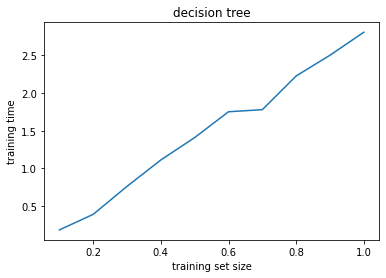

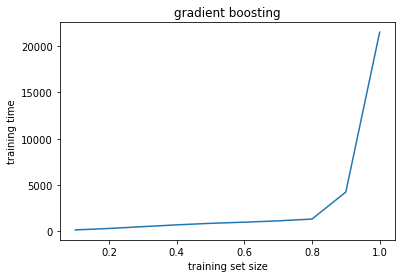

In [ ]:
plt.plot(frac_list,tree_time)
plt.title('decision tree')
plt.xlabel('training set size')
plt.ylabel('training time')
plt.show()

plt.plot(frac_list,gb_time)
plt.title('gradient boosting')
plt.xlabel('training set size')
plt.ylabel('training time')
plt.show()

## Q5

* As the traning set size increases from 0.1 to 1, the accuracy of decision tree increases from 0.66 to 0.81, and the accuracy of gradient boosting increases from 0.71 to 0.94. In the graph, the accuracy of decision tree is overall higher than the accuracy of gradient boosting.
* As the traning set size increases from 0.1 to 1, the training time of decision tree increases from 0.19 to 2.8, and the training time of gradient boosting increases from 134.96 to 21506.11. We can see that the time of gradient boosting is overall extremely larger than the time of decision tree. In both graphs, the changes of time are both increasing.
* Gradient Boosting has better accuracy but Decision Tree has shorter training time